In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.3 MB/s eta 0:00:00


In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

# load image from the IAM database
url = '/content/Screenshot 2023-09-27 at 12.20.34 AM.png'
image = Image.open(url).convert("RGB")

processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')
pixel_values = processor(images=image, return_tensors="pt").pixel_values

generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1260: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [ ]:
!pip install pytesseract

In [ ]:
!apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (12.9 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 120875 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

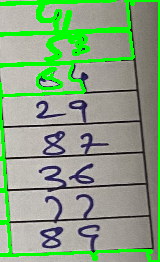

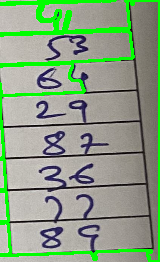

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image
image = cv2.imread('/content/Screenshot 2023-09-27 at 12.20.34 AM.png')

# Preprocess
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find contours
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])

# Draw all contours on image copy
contour_img = image.copy()
cv2.drawContours(contour_img, cnts, -1, (0,255,0), 2)

# Display contour image
cv2_imshow(contour_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Extract table contour
table_contour = max(cnts, key=cv2.contourArea)

# Draw table contour on image copy
table_img = image.copy()
cv2.drawContours(table_img, [table_contour], -1, (0,255,0), 2)

# Display table contour image
cv2_imshow(table_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

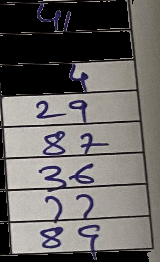

-1

In [ ]:
# Get table contour coordinates
x,y,w,h = cv2.boundingRect(table_contour)

# Create mask from contour
mask = np.zeros(image.shape[:2], np.uint8)
cv2.drawContours(mask, [table_contour], -1, 255, -1)

# Extract table image using bitwise-and
table_image = cv2.bitwise_and(image, image, mask=mask)

# Crop table image to contour bounding box
table_image = table_image[y:y+h, x:x+w]

# Display extracted table image
cv2_imshow(table_image)
cv2.waitKey(0)

In [ ]:
!pip install paddlepaddle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.4 MB/s eta 0:00:00


In [ ]:
!pip install paddleocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.7/465.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 25.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!wget http://nz2.archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb

!sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb

--2023-10-09 04:28:34--  http://nz2.archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb
Resolving nz2.archive.ubuntu.com (nz2.archive.ubuntu.com)... 91.189.91.83, 185.125.190.36, 91.189.91.81, ...
Connecting to nz2.archive.ubuntu.com (nz2.archive.ubuntu.com)|91.189.91.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1321244 (1.3M) [application/vnd.debian.binary-package]
Saving to: ‘libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb’

libssl1.1_1.1.1f-1u 100%[===================>]   1.26M  6.01MB/s    in 0.2s    

2023-10-09 04:28:35 (6.01 MB/s) - ‘libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb’ saved [1321244/1321244]

Selecting previously unselected package libssl1.1:amd64.
(Reading database ... 120922 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.19) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.19) ...
debconf: unable to initialize fronten

In [ ]:
from paddleocr import PaddleOCR

# Initialize PaddleOCR with English language support and angle classification
ocr = PaddleOCR(use_angle_cls=True, lang='en')

# Path to the image you want to perform OCR on
img_path = '/content/Screenshot 2023-10-09 at 10.11.34 AM.png'

# Perform OCR on the image
result = ocr.ocr(img_path, cls=True)

# Iterate through the results and print the detected text lines
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)


[2023/10/09 04:42:15] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

In [ ]:
for index, res in enumerate(result):
  print(res[index][1][0])

In [ ]:
df

In [ ]:
!pip install transformers

In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

# load image from the IAM database
def get_text(url):
  image = Image.open(url).convert("RGB")

  processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
  model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')
  pixel_values = processor(images=image, return_tensors="pt").pixel_values

  generated_ids = model.generate(pixel_values)
  generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
  return generated_text


Saving Screenshot 2023-09-27 at 12.20.34 AM.png to Screenshot 2023-09-27 at 12.20.34 AM (1).png


(1, 1)


(1, 1)


(1, 2)


(31, 10)


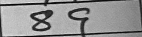

(37, 142)


(31, 8)


(1, 1)


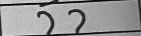

(36, 141)


(29, 6)


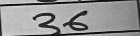

(36, 140)


(30, 4)


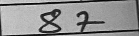

(36, 139)


(17, 2)


(4, 10)


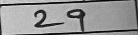

(35, 138)


(2, 1)


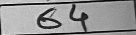

(35, 136)


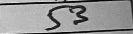

(34, 133)


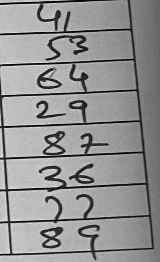

(262, 160)


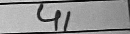

(34, 130)


(3, 69)


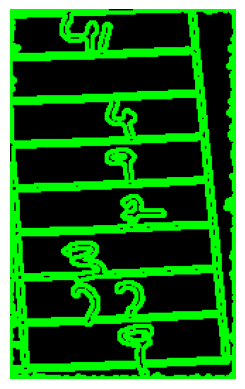

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow

# Upload the image in Google Colab
uploaded = files.upload()

# Assuming the uploaded file is named "image.png"
image_path = next(iter(uploaded))

# Load the image
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to binarize the image
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11, 2.0)
# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty canvas to draw the contours on
contour_image = np.zeros_like(image)

# List to store extracted digits
extracted_digits = []

con = 0
# Loop through the contours
for i, contour in enumerate(contours):
    # Get the bounding box of the contour
    x, y, w, h = cv2.boundingRect(contour)

    # Extract the digit from the original image using the bounding box
    digit = image[y:y+h, x:x+w]

    # Save the digit image with a unique filename (e.g., "digit0.png", "digit1.png", etc.)
    filename = f"digit{i}.png"
    cv2.imwrite(filename, digit)

    digit_gray = cv2.cvtColor(digit, cv2.COLOR_BGR2GRAY)
    cv2_imshow(digit_gray)

    pil_image = Image.fromarray(digit_gray)
    # Convert grayscale to RGB
    digit_rgb = pil_image.convert('RGB')
    print(digit_gray.shape)
    # Append the extracted digit to the list
    extracted_digits.append(digit)

    # Draw the contour on the canvas
    cv2.drawContours(contour_image, [contour], -1, (0, 255, 0), 2)

# Display the image with contours using Matplotlib
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Now, you have a list of extracted digits in the 'extracted_digits' variable for further processing or recognition.


In [ ]:
extracted_digits

In [ ]:
for i in range(len(extracted_text)):
    print(f"OCR Result for Digit {i + 1}: {extracted_text[i]}")
    cv2_imshow(np.array(extracted_digits[i]))


NameError: ignored

In [ ]:
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from PIL import Image
import os
list1 = []

# Iterate through files in the current directory
for i in os.listdir():
    if i.startswith('digit'):
        # Open the image using PIL
        try:
            with Image.open(i) as img:
                # Check if the image is not empty (has non-zero dimensions)
                if img.size[0] > 10 and img.size[1] > 10:
                    list1.append(i)
        except Exception as e:
            # Handle any exceptions that may occur when opening the image
            print(f"Error processing {i}: {str(e)}")

# Now, list1 contains the paths of non-empty images that start with 'digit'


In [ ]:
list1

['digit4.png',
 'digit19.png',
 'digit7.png',
 'digit18.png',
 'digit11.png',
 'digit16.png',
 'digit17.png',
 'digit14.png',
 'digit9.png']

In [ ]:
for i in list1:
  print(get_text(i))

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


sigr


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


41


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


52


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


1 1 )


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


87


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


64


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


53.


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


29


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


36


In [ ]:
import cv2

In [ ]:
img = cv2.imread("/content/IMG_9517.HEIC")

In [ ]:
print(img)

None
